# Machine Learning for Car Market Value Prediction

## Table of Contents <a id='back'></a>

* [1. Introduction](#intro)
* [2. Initiation](#init)
* [3. Data Overview](#overview)
	* [3.1. Understanding Data](#1)
	* [3.2. Data Preparation](#2)
		* [3.2.1. Data Cleaning](#21)
		* [3.2.2. Derive New Variable](#22)
* [4. Model Training](#train)
	* [4.1. Defining Features and Targets](#3)
	* [4.2. Defining Evaluation Metrics](#4)
	* [4.3. Model Training](#5)
		* [4.3.1. Linear Regression](#51)
		* [4.3.2. Random Forest Regressor](#52)
		* [4.3.3. LightGBM](#53)
		* [4.3.4. XGBoost](#54)
		* [4.3.5. CatBoost](#55)
* [5. Model Analysis](#ana)
	* [5.1. Linear Regression](#61)
	* [5.2. Random Forest Regressor](#62)
	* [5.3. LightGBM](#63)
	* [5.4. XGBoost](#64)
	* [5.5. CatBoost](#65)
	* [5.6. Brief Summary](#66)
* [6. General Conclusion](#end)


## 1. Introduction <a id='intro'></a>

### 1.1. Project Description

Rusty Bargain is a used car buying and selling company that is currently developing an application to attract new buyers. In this application, you can quickly determine the market value of your car. You have access to historical data, technical specifications of vehicles, vehicle model versions, and vehicle prices. Your task is to create a model that can determine the market value of cars.

Rusty Bargain is interested in:

* prediction accuracy;
* model speed in making predictions;
* time required to train the model.

### 1.2. Objectives

Create a model that can determine the market value of cars with high accuracy, high prediction speed and low training time.

### 1.3. Data Description

Features:
* DateCrawled — date when profile is uploaded to the database
* VehicleType — vehicle type
* RegistrationYear — vehicle registration year
* Gearbox — transmission type
* Power — power (hp)
* Model — vehicle model
* Mileage — distance (km)
* RegistrationMonth — vehicle registration month
* FuelType — fuel type
* Brand — vehicle brand
* NotRepaired — has the vehicle been repaired before
* DateCreated — profile creation date
* NumberOfPictures — number of vehicle pictures
* PostalCode — user postal code
* LastSeen — user last seen date

Target:
* Price — price (Euro)

### 1.4. Methodology

The steps taken in this research are:
1. Exploratory Data Analysis:
 1. Understanding data
 2. Data Preprocessing
 3. Statistical Analysis
 4. Correlation Analysis
2. Model Training and Validation
3. Model Analysis
4. Conclusion

## 2. Initiation <a id='init'></a>

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import missingno as msno
from datetime import date, timedelta
import time

In [3]:
np.random.seed(0)
state = np.random.RandomState(0)

In [4]:
df = pd.read_csv('/datasets/car_data.csv')

## 3. Data Overview <a id='overview'></a>

### 3.1. Understanding Data <a id='1'></a>

#### 3.1.1. Basic Info

In [5]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [7]:
df.columns = map(str.lower, df.columns)

#### 3.1.2. Duplicated data

In [8]:
print(f'Total number of duplicated rows = {df.duplicated().sum()}')

Total number of duplicated rows = 262


In [9]:
df[df.duplicated(keep=False)].sort_values(by=['price','datecrawled','postalcode']).head(4)

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
70276,09/03/2016 20:45,0,NaN,1985,NaN,0,other,100000,0,NaN,alfa_romeo,NaN,09/03/2016 00:00,0,75203,06/04/2016 21:17
306497,09/03/2016 20:45,0,NaN,1985,NaN,0,other,100000,0,NaN,alfa_romeo,NaN,09/03/2016 00:00,0,75203,06/04/2016 21:17
51498,15/03/2016 10:56,0,wagon,2006,manual,122,other,150000,1,NaN,chevrolet,no,15/03/2016 00:00,0,44287,18/03/2016 03:18
256274,15/03/2016 10:56,0,wagon,2006,manual,122,other,150000,1,NaN,chevrolet,no,15/03/2016 00:00,0,44287,18/03/2016 03:18


#### 3.1.3. Missing Data

In [10]:
print(f'Total number of missing data = {df.isna().sum().sum():,}')

Total number of missing data = 181,077


In [11]:
print('Proportion of missing data by columns:')
df.isna().sum()[df.isna().sum() > 0]/df.shape[0]

Proportion of missing data by columns:


vehicletype    0.105794
gearbox        0.055967
model          0.055606
fueltype       0.092827
notrepaired    0.200791
dtype: float64

In [12]:
print('VehicleType unique values =', list(df['vehicletype'].unique()))
print('Gearbox unique values =', list(df['gearbox'].unique()))
print('Model unique values =', list(df['model'].unique()))
print()
print('FuelType unique values =', list(df['fueltype'].unique()))
print('NotRepaired unique values =', list(df['notrepaired'].unique()))

VehicleType unique values = [nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus', 'wagon', 'other']
Gearbox unique values = ['manual', 'auto', nan]
Model unique values = ['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max', '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse', 'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter', 'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one', 'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta', 'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort', 'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo', 'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza', 'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan', '6_reihe', 'panda', 'up', 'seicento

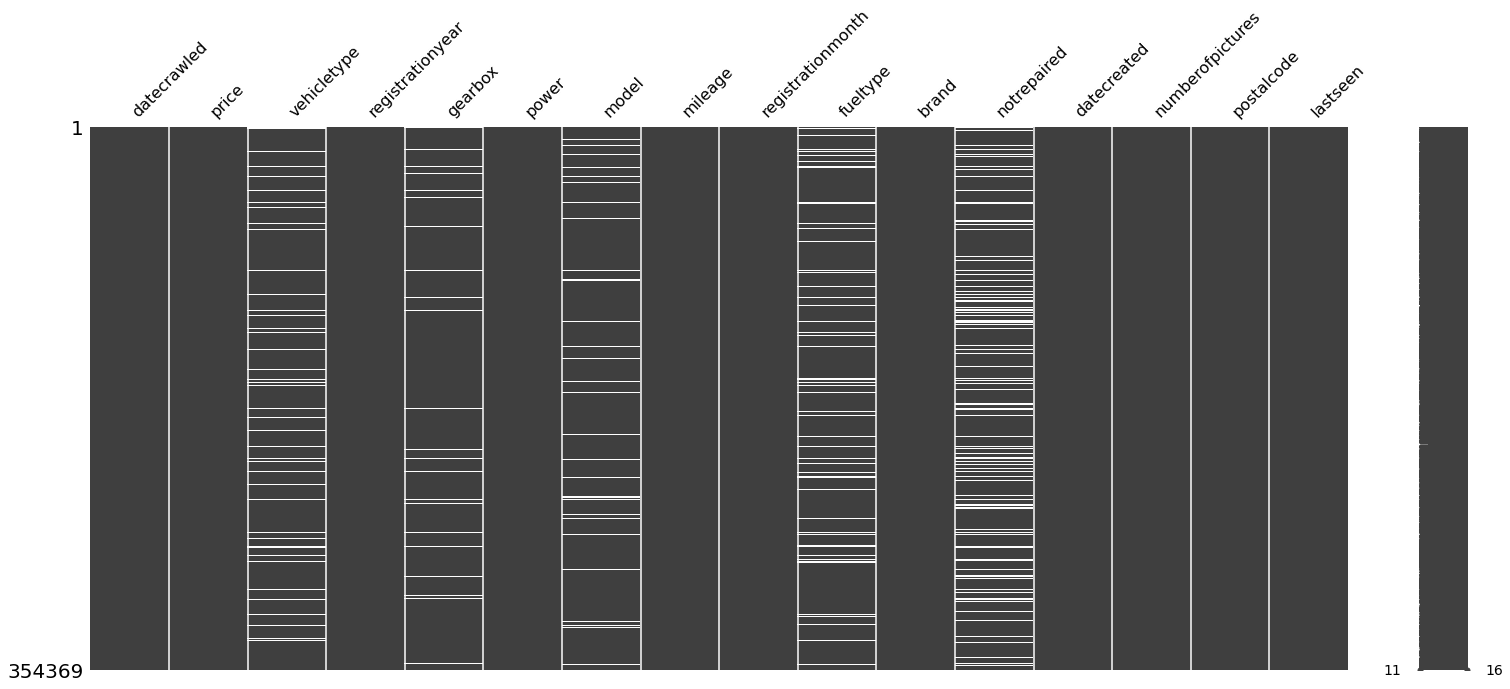

In [13]:
msno.matrix(df)
plt.show()

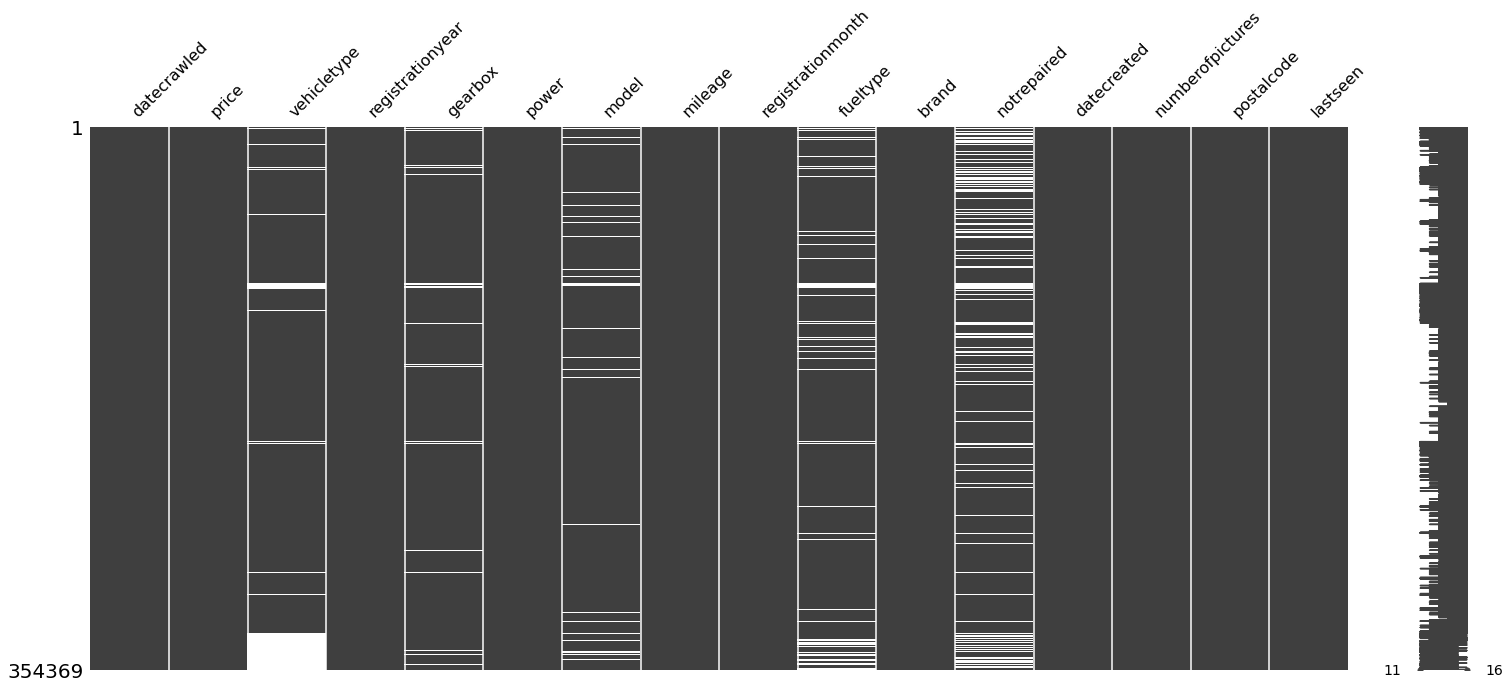

In [14]:
msno.matrix(df.sort_values(by=['registrationyear','registrationmonth'],ascending=['False','False']))
plt.show()

#### 3.1.4. Statistics

In [15]:
df.describe()

,price,registrationyear,power,mileage,registrationmonth,numberofpictures,postalcode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [16]:
df[df['registrationyear'] < 2023].describe()

,price,registrationyear,power,mileage,registrationmonth,numberofpictures,postalcode
count,354264.000000,354264.000000,354264.000000,354264.000000,354264.000000,354264.0,354264.000000
mean,4417.097108,2002.931805,110.093961,128246.209042,5.715932,0.0,50510.983422
std,4514.051658,13.976363,189.627998,37855.202965,3.725853,0.0,25783.787478
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,2019.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [17]:
df[df['registrationyear'] >= 2023].describe()

,price,registrationyear,power,mileage,registrationmonth,numberofpictures,postalcode
count,105.000000,105.000000,105.000000,105.00000,105.000000,105.0,105.000000
mean,2931.000000,6399.276190,111.361905,10000.00000,1.371429,0.0,42767.733333
std,4650.880665,2750.727549,569.106116,16655.44494,3.064239,0.0,22118.427833
min,0.000000,2066.000000,0.000000,5000.00000,0.000000,0.0,1239.000000
25%,50.000000,4100.000000,0.000000,5000.00000,0.000000,0.0,27432.000000
50%,500.000000,5911.000000,0.000000,10000.00000,0.000000,0.0,40822.000000
75%,4000.000000,9996.000000,3.000000,10000.00000,0.000000,0.0,55743.000000
max,20000.000000,9999.000000,5000.000000,150000.00000,12.000000,0.0,96465.000000


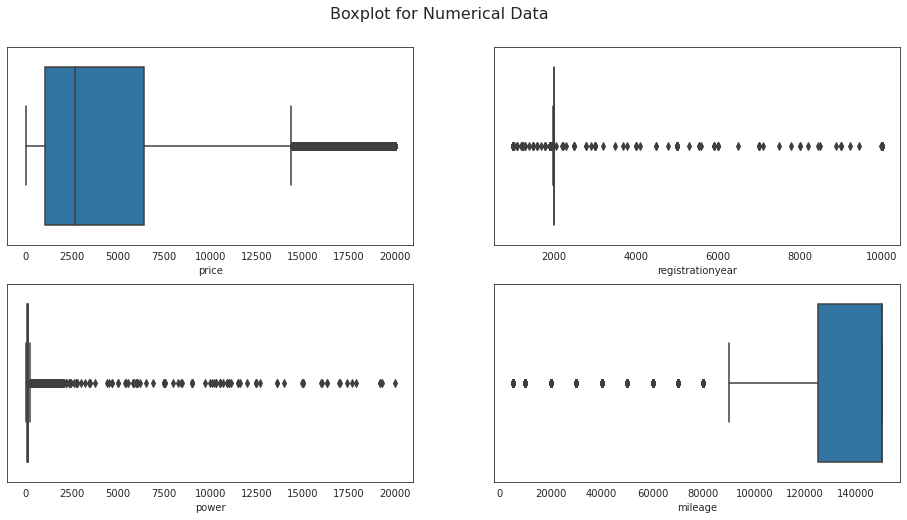

In [18]:
sns.set_style('white')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))

sns.boxplot(data=df, x='price',ax=ax[0,0])
sns.boxplot(data=df, x='registrationyear',ax=ax[0,1])
sns.boxplot(data=df, x='power',ax=ax[1,0])
sns.boxplot(data=df, x='mileage',ax=ax[1,1])

fig.suptitle('Boxplot for Numerical Data', y=0.95,fontsize=16)
plt.show()

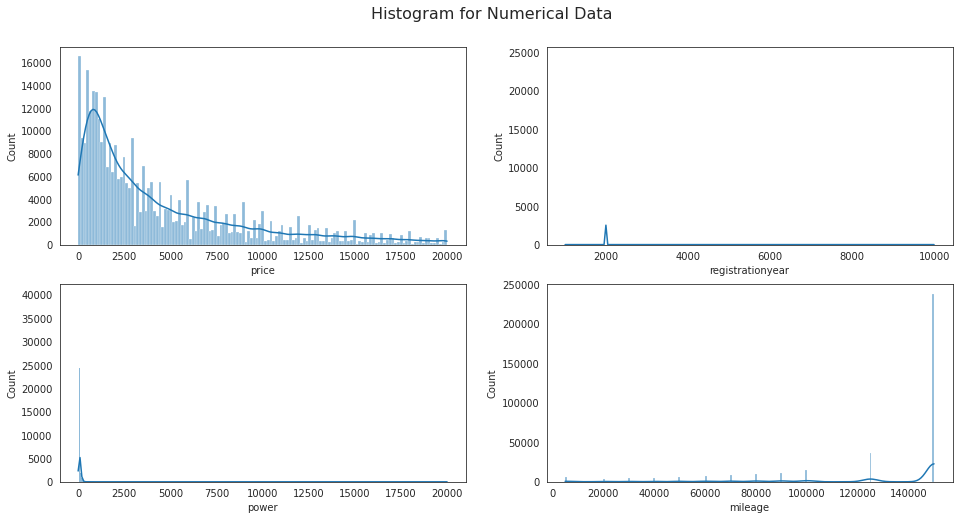

In [19]:
sns.set_style('white')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8),sharex=False)

sns.histplot(data=df, x='price',kde=True,ax=ax[0,0])
sns.histplot(data=df, x='registrationyear',kde=True,ax=ax[0,1])
sns.histplot(data=df, x='power',kde=True,ax=ax[1,0])
sns.histplot(data=df, x='mileage',kde=True,ax=ax[1,1])

fig.suptitle('Histogram for Numerical Data', y=0.95,fontsize=16)
plt.show()

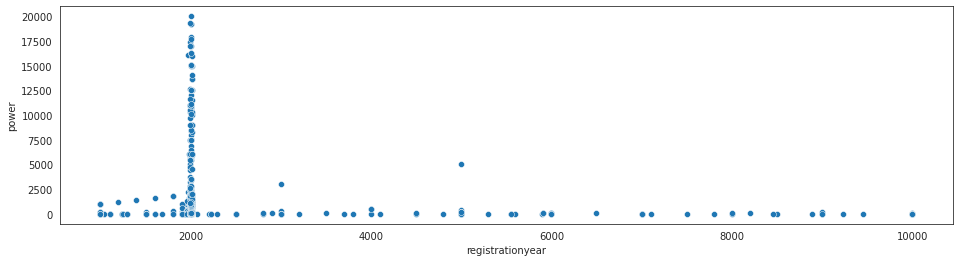

In [20]:
plt.figure(figsize=(16,4))
sns.scatterplot(data=df, x='registrationyear', y='power')
plt.show()

#### 3.1.5. Key Findings

* The dataset is composed of 354,369 rows and 16 columns.
* `DateCrawled, DateCreated, and LastSeen` is in the wrong datatype.
* There are 262 duplicated rows.
* There are 181,077 missing data in these columns: `VehicleType; Gearbox; Model; FuelType; and NotRepaired`.
 * Missing data for `VehicleType` are in vehicles with newer registration dates.
 * `NotRepaired` data are missing more frequently in older registered vehicles.
 * Other missing data seems to be appearing at random.
* There are outliers in `RegistrationYear, and Power` columns.
    * Vehicles with `RegistrationYear` far in the future (after 2019) and after maximum `DateCrawled` which is illogical.
    * Vehicles with `Power` more than 2,012 hp is illogical as typical vehicles have 180-200 hp and the highest ever reached is 2,012 hp.
* There are columns with `RegistrationMonth` equals to 0 which is illogical.
* All the values in `NumberOfPictures` column equal to 0.

### 3.2. Data Preparation <a id='2'></a>

#### 3.2.1. Data Cleaning <a id='21'></a>

##### 3.2.1.1. Datatype Validation

DateCrawled, DateCreated, and LastSeen will be changed into datetime format.

In [21]:
df['datecrawled'] = pd.to_datetime(df['datecrawled'], utc=True)
df['datecreated'] = pd.to_datetime(df['datecreated'], utc=True)
df['lastseen'] = pd.to_datetime(df['lastseen'], utc=True)

In [22]:
df.dtypes

datecrawled          datetime64[ns, UTC]
price                              int64
vehicletype                       object
registrationyear                   int64
gearbox                           object
power                              int64
model                             object
mileage                            int64
registrationmonth                  int64
fueltype                          object
brand                             object
notrepaired                       object
datecreated          datetime64[ns, UTC]
numberofpictures                   int64
postalcode                         int64
lastseen             datetime64[ns, UTC]
dtype: object

In [23]:
df['datecrawled'].max(), df['datecreated'].max(), df['lastseen'].max()

(Timestamp('2016-12-03 23:59:00+0000', tz='UTC'),
 Timestamp('2016-12-03 00:00:00+0000', tz='UTC'),
 Timestamp('2016-12-03 23:54:00+0000', tz='UTC'))

In [24]:
max_date = df['datecrawled'].dt.date.max()
max_date

datetime.date(2016, 12, 3)

##### 3.2.1.2. Duplicates

Drop all duplicated values.

In [25]:
df.drop_duplicates(inplace=True)

##### 3.2.1.3. Invalid Data

Since data with registration year after 2023 and registration month equals to 0 are invalid, we will remove those values.

In [26]:
df = df[(df['registrationyear'] < 2023) & (df['registrationmonth'] > 0)]

##### 3.2.1.4. Missing Values

Check whether missing VehicleType, Gearbox, and FuelType values can be filled using available data in vehicles with the same brand and model.

In [27]:
df[df.notnull()==True][['brand','model','vehicletype','gearbox','fueltype']].sort_values(by=['brand','model']).sample(20, random_state=state)

,brand,model,vehicletype,gearbox,fueltype
191838,smart,fortwo,convertible,auto,petrol
52357,ford,other,other,auto,petrol
271012,opel,NaN,NaN,manual,NaN
20334,audi,a4,wagon,manual,petrol
85023,opel,astra,wagon,manual,petrol
203100,peugeot,2_reihe,small,auto,petrol
66577,mercedes_benz,c_klasse,wagon,auto,gasoline
348973,mercedes_benz,c_klasse,sedan,manual,petrol
322529,porsche,cayenne,suv,auto,petrol
103785,volkswagen,polo,NaN,NaN,petrol


Based on samples above, it seems that even the same Brand and Model can have different VehicleType, Gearbox, and FuelType values.

Therefore, we will just remove all the missing values listwise.

In [28]:
df.dropna(inplace=True)
print('Resulting dataset without missing values has', df.shape[0], 'rows and', df.shape[0], 'columns.')

Resulting dataset without missing values has 238036 rows and 238036 columns.


##### 3.2.1.5. Outliers

Remove vehicles with registration year before lower bound and after upper bound.

In [29]:
iqr = st.iqr(df['registrationyear'])
lower = df['registrationyear'].quantile(0.25) - 1.5*iqr
upper = min(df['registrationyear'].quantile(0.75) + 1.5*iqr, max_date.year+1)
lower,upper

(1987.0, 2017)

In [30]:
print('Number of rows with registrationyear outlier to be removed =', df[(df['registrationyear'] < lower) | (df['registrationyear'] > upper)].shape[0])

Number of rows with registrationyear outlier to be removed = 3069


In [31]:
df = df[(df['registrationyear'] > lower) & (df['registrationyear'] < upper)]

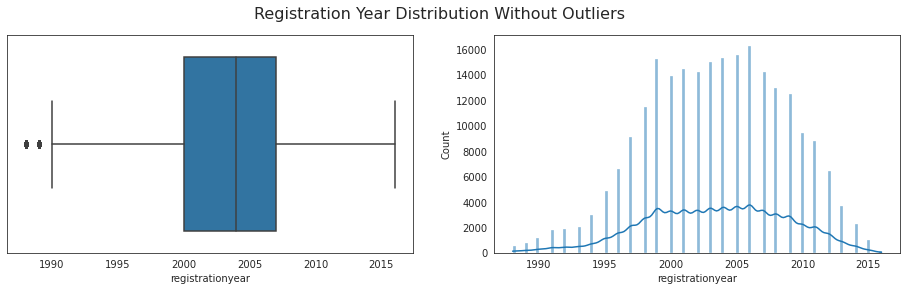

In [32]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(data=df, x='registrationyear',ax=ax[0])
sns.histplot(data=df, x='registrationyear',kde=True,ax=ax[1])
fig.suptitle('Registration Year Distribution Without Outliers', y=0.98,fontsize=16)
plt.show()

Remove vehicles with power less than lower bound and more than upper bound.

In [33]:
iqr = st.iqr(df['power'])
lower = df['power'].quantile(0.25) - 1.5*iqr
upper = df['power'].quantile(0.75) + 1.5*iqr
lower,upper

(-37.5, 262.5)

In [34]:
print('Number of rows with power outlier to be removed =', df[(df['power'] < lower) | (df['power'] > upper)].shape[0])

Number of rows with power outlier to be removed = 4877


In [35]:
df = df[(df['power'] > lower) & (df['power'] < upper)]

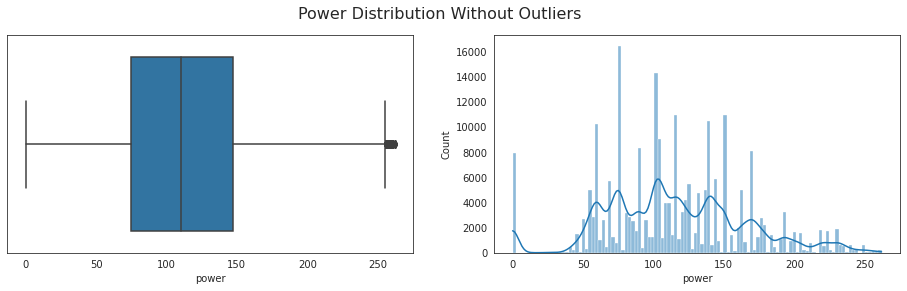

In [36]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(data=df, x='power',ax=ax[0])
sns.histplot(data=df, x='power',kde=True,ax=ax[1])
fig.suptitle('Power Distribution Without Outliers', y=0.98,fontsize=16)
plt.show()

After removing the outliers, we get a more representative dataset for further model training.

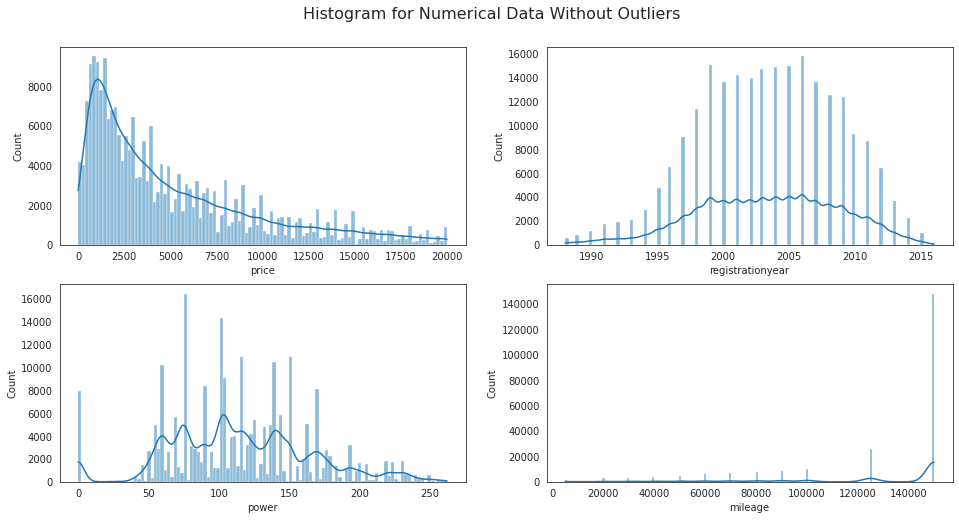

In [37]:
sns.set_style('white')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8),sharex=False)

sns.histplot(data=df, x='price',kde=True,ax=ax[0,0])
sns.histplot(data=df, x='registrationyear',kde=True,ax=ax[0,1])
sns.histplot(data=df, x='power',kde=True,ax=ax[1,0])
sns.histplot(data=df, x='mileage',kde=True,ax=ax[1,1])

fig.suptitle('Histogram for Numerical Data Without Outliers', y=0.95,fontsize=16)
plt.show()

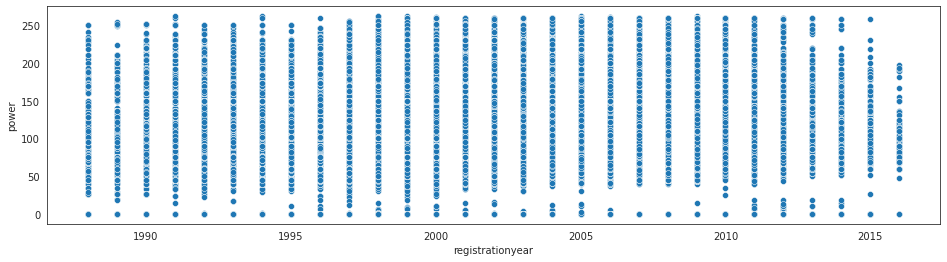

In [38]:
plt.figure(figsize=(16,4))
sns.scatterplot(data=df, x='registrationyear', y='power')
plt.show()

#### 3.2.2. Derive New Variable <a id='22'></a>

Derive new variable age which is the difference between maximum date and registration date (combination of registration year and month).

In [39]:
df['registrationdate'] = df.apply(lambda x: str(x['registrationyear']) + '/' + str(x['registrationmonth']) + '/01', axis=1)

In [40]:
df['registrationdate'] = pd.to_datetime(df['registrationdate'],utc=True)

In [41]:
df['registrationdate'].head(5)

3    2001-06-01 00:00:00+00:00
4    2008-07-01 00:00:00+00:00
5    1995-10-01 00:00:00+00:00
6    2004-08-01 00:00:00+00:00
10   2004-12-01 00:00:00+00:00
Name: registrationdate, dtype: datetime64[ns, UTC]

In [42]:
df['age'] = max_date - df['registrationdate'].dt.date
df['age'] = df['age'] / timedelta(days=1)
df['age'].describe()

count    229701.000000
mean       4777.663119
std        1950.425877
min           2.000000
25%        3320.000000
50%        4720.000000
75%        6212.000000
max       10564.000000
Name: age, dtype: float64

In [43]:
df['age'] = df['age'].astype(int)

## 4. Model Training <a id='train'></a>

### 4.1. Defining Features and Targets <a id='3'></a>

Define features and targets.

In [44]:
features = df.drop(['datecrawled','datecreated','lastseen',
                    'registrationyear','registrationmonth','registrationdate','price'],axis=1)
target = df['price']

In [45]:
features.columns

Index(['vehicletype', 'gearbox', 'power', 'model', 'mileage', 'fueltype',
       'brand', 'notrepaired', 'numberofpictures', 'postalcode', 'age'],
      dtype='object')

In [46]:
numerical = ['power','mileage','numberofpictures','postalcode','age']
categorical = set(features.columns).difference(numerical)

Encode features categorical columns.

In [47]:
features_en = pd.get_dummies(features, drop_first=True)

In [48]:
features_en.head(1)

,power,mileage,numberofpictures,postalcode,age,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notrepaired_yes
3,75,150000,0,91074,5664,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [49]:
categorical_en = set(features_en.columns).difference(numerical)

Split target columns.

In [50]:
target_train, target_valid = train_test_split(target, test_size=0.3, random_state=state)

In [51]:
target_train.shape, target_valid.shape

((160790,), (68911,))

Split features columns.

In [52]:
features_train = features.loc[target_train.index,:]
features_valid = features.loc[target_valid.index,:]
features_train_en = features_en.loc[target_train.index,:]
features_valid_en = features_en.loc[target_valid.index,:]

In [53]:
features_train.shape, features_valid.shape, features_train_en.shape, features_valid_en.shape

((160790, 11), (68911, 11), (160790, 303), (68911, 303))

Standardize numerical feature columns.

In [54]:
scaler = StandardScaler()
scaler.fit(features_train_en[numerical])

StandardScaler()

In [55]:
features_train_num_std = pd.DataFrame(scaler.transform(features_train[numerical]), columns=numerical, index=features_train.index)
features_valid_num_std = pd.DataFrame(scaler.transform(features_valid[numerical]), columns=numerical, index=features_valid.index)

Combine encoded and standardized columns.

In [56]:
features_train_std = pd.concat([features_train_num_std, features_train[categorical]], axis=1)
features_valid_std = pd.concat([features_valid_num_std, features_valid[categorical]], axis=1)

In [57]:
features_train_std_en = pd.concat([features_train_num_std, features_train_en[categorical_en]], axis=1)
features_valid_std_en = pd.concat([features_valid_num_std, features_valid_en[categorical_en]], axis=1)

In [58]:
features_train_std_en.shape, features_valid_std_en.shape

((160790, 303), (68911, 303))

### 4.2. Defining Evaluation Metrics <a id='4'></a>

In [59]:
def rmse(target, prediction):
    return mean_squared_error(target, prediction)**0.5

In [60]:
rmse_score = make_scorer(rmse, greater_is_better=False)

### 4.3. Model Training <a id='5'></a>

#### 4.3.1. Linear Regression <a id='51'></a>

In [61]:
model_lr = LinearRegression()
score_lr = cross_val_score(model_lr, features_train_std_en, target_train, cv=5, scoring=rmse_score)
print('RMSE =', score_lr)
print('Average RMSE =', score_lr.mean())

RMSE = [-2.24296705e+03 -2.31109110e+03 -2.27082100e+03 -3.22975808e+10
 -1.34648950e+08]
Average RMSE = -6486447316.297686


#### 4.3.2. Random Forest Regressor <a id='52'></a>

Create dictionary of hyperparameters for model training.

In [62]:
parameters_rfr = {'n_estimators' : list(np.arange(15,21,5)),
                 'max_depth' : list(np.arange(16,19,2))}

In [63]:
model_rfr = RandomForestRegressor(random_state=state, criterion='mse')

grid_rfr = GridSearchCV(model_rfr, param_grid=parameters_rfr, scoring=rmse_score, cv=5)
grid_rfr_fit = grid_rfr.fit(features_train_std_en, target_train)

In [64]:
print(grid_rfr_fit.best_estimator_)
print(grid_rfr_fit.best_score_)

RandomForestRegressor(max_depth=18, n_estimators=20,
                      random_state=RandomState(MT19937) at 0x7F9AB0CED740)
-1597.7797238038415


#### 4.3.3. LightGBM <a id='53'></a>

In [65]:
parameters = {'learning_rate': list(np.linspace(0.2,0.4,2)),
             'max_depth' : list(np.arange(16,19,2))}

In [66]:
model_lgb = LGBMRegressor(random_state=state, metric='rmse')

grid_lgb = GridSearchCV(model_lgb, param_grid=parameters, scoring=rmse_score, cv=5)
grid_lgb_fit = grid_lgb.fit(features_train_std_en, target_train)

In [67]:
print(grid_lgb_fit.best_estimator_)
print(grid_lgb_fit.best_score_)

LGBMRegressor(learning_rate=0.4, max_depth=16, metric='rmse',
              random_state=RandomState(MT19937) at 0x7F9AB0CEDA40)
-1568.9274419927776


#### 4.3.4. XGBoost <a id='54'></a>

In [68]:
model_xgb = XGBRegressor(seed=0, eval_metric='rmse', learning_rate=0.2, max_depth=10)
score_xgb = cross_val_score(model_xgb,features_train_std_en, target_train, cv=3, scoring=rmse_score)
print('RMSE =', score_xgb)
print('Average RMSE =', score_xgb.mean())

RMSE = [-1524.22143625 -1538.89917233 -1525.51757016]
Average RMSE = -1529.5460595783854


#### 4.3.5. CatBoost <a id='55'></a>

In [69]:
model_cb = CatBoostRegressor(random_seed=0, loss_function="RMSE", learning_rate=0.1, max_depth=10, verbose=500)
score_cb = cross_val_score(model_cb, features_train_std_en, target_train, cv=3, scoring=rmse_score)
print('RMSE =', score_cb)
print('Average RMSE =', score_cb.mean())

0:	learn: 4292.2282328	total: 164ms	remaining: 2m 43s
500:	learn: 1375.5484613	total: 51.3s	remaining: 51.1s
999:	learn: 1256.6186797	total: 1m 42s	remaining: 0us
0:	learn: 4281.8669245	total: 95.8ms	remaining: 1m 35s
500:	learn: 1367.5598457	total: 51.4s	remaining: 51.2s
999:	learn: 1250.6628727	total: 1m 42s	remaining: 0us
0:	learn: 4281.2995861	total: 99.2ms	remaining: 1m 39s
500:	learn: 1373.8722962	total: 48.1s	remaining: 47.9s
999:	learn: 1261.9204248	total: 1m 36s	remaining: 0us
RMSE = [-1488.62637951 -1500.88812482 -1499.16218489]
Average RMSE = -1496.2255630759762


## 5. Model Analysis <a id='ana'></a>

We will use the best parameter and default hyperparameter setting for analysis.

In [70]:
rmse_train = {}
rmse_valid = {}
training_time = {}
prediction_time = {}

### 5.1. Linear Regression <a id='61'></a>

In [71]:
def rmse(target, prediction):
    return mean_squared_error(target, prediction)**0.5

In [72]:
model_lr = LinearRegression()

start_train = time.time()
model_lr.fit(features_train_std_en, target_train)
training_time['LinearRegression'] = time.time() - start_train

start_predict = time.time()
predicted_valid_lr = model_lr.predict(features_valid_std_en)
prediction_time['LinearRegression'] = time.time() - start_predict

predicted_train_lr = model_lr.predict(features_train_std_en)

In [76]:
rmse_valid['LinearRegression'] = rmse(target_valid, predicted_valid_lr)
rmse_train['LinearRegression'] = rmse(target_train, predicted_train_lr)

In [77]:
print('RMSE train set =', rmse_train['LinearRegression'])
print('RMSE valid set =', rmse_valid['LinearRegression'])
print("Training time:", training_time['LinearRegression'])
print("Prediction time:", prediction_time['LinearRegression'])

RMSE train set = 2269.218053645167
RMSE valid set = 2279.8156289443327
Training time: 12.101051807403564
Prediction time: 0.13241958618164062


### 5.2. Random Forest Regressor <a id='62'></a>

#### Default

In [78]:
model_rfr_d = RandomForestRegressor(random_state=state)

start_train = time.time()
model_rfr_d.fit(features_train_std_en, target_train)
training_time['RandomForest_Default'] = time.time() - start_train

start_predict = time.time()
predicted_valid_rfr = model_rfr_d.predict(features_valid_std_en)
prediction_time['RandomForest_Default'] = time.time() - start_predict

predicted_train_rfr = model_rfr_d.predict(features_train_std_en)

In [79]:
rmse_valid['RandomForest_Default'] = rmse(target_valid, predicted_valid_rfr)
rmse_train['RandomForest_Default'] = rmse(target_train, predicted_train_rfr)

In [80]:
print('RMSE train set =', rmse_train['RandomForest_Default'])
print('RMSE valid set =', rmse_valid['RandomForest_Default'])
print("Training time:", training_time['RandomForest_Default'])
print("Prediction time:", prediction_time['RandomForest_Default'])

RMSE train set = 581.7803972469337
RMSE valid set = 1518.9981221159815
Training time: 321.91933822631836
Prediction time: 4.268805503845215


#### Best Hyperparameters

In [81]:
model_rfr_b = RandomForestRegressor(random_state=state, criterion='mse', n_estimators=20 ,max_depth=18)

start_train = time.time()
model_rfr_b.fit(features_train_std_en, target_train)
training_time['RandomForest_Best'] = time.time() - start_train

start_predict = time.time()
predicted_valid_rfr = model_rfr_b.predict(features_valid_std_en)
prediction_time['RandomForest_Best'] = time.time() - start_predict

predicted_train_rfr = model_rfr_b.predict(features_train_std_en)

In [82]:
rmse_valid['RandomForest_Best'] = rmse(target_valid, predicted_valid_rfr)
rmse_train['RandomForest_Best'] = rmse(target_train, predicted_train_rfr)

In [83]:
print('RMSE train set =', rmse_train['RandomForest_Best'])
print('RMSE valid set =', rmse_valid['RandomForest_Best'])
print("Training time:", training_time['RandomForest_Best'])
print("Prediction time:", prediction_time['RandomForest_Best'])

RMSE train set = 1098.3529041868433
RMSE valid set = 1591.7196333468846
Training time: 48.33392906188965
Prediction time: 0.45217299461364746


### 5.3. LightGBM <a id='63'></a>

#### Default

In [84]:
model_lgb_d = LGBMRegressor(random_state=state, metric='rmse')

start_train = time.time()
model_lgb_d.fit(features_train_std_en, target_train)
training_time['LightGBM_Default'] = time.time() - start_train

start_predict = time.time()
predicted_valid_lgb = model_lgb_d.predict(features_valid_std_en)
prediction_time['LightGBM_Default'] = time.time() - start_predict

predicted_train_lgb = model_lgb_d.predict(features_train_std_en)

In [85]:
rmse_valid['LightGBM_Default'] = rmse(target_valid, predicted_valid_lgb)
rmse_train['LightGBM_Default'] = rmse(target_train, predicted_train_lgb)

In [86]:
print('RMSE train set =', rmse_train['LightGBM_Default'])
print('RMSE valid set =', rmse_valid['LightGBM_Default'])
print("Training time:", training_time['LightGBM_Default'])
print("Prediction time:", prediction_time['LightGBM_Default'])

RMSE train set = 1579.329082403732
RMSE valid set = 1605.200825030955
Training time: 6.859330654144287
Prediction time: 0.9216184616088867


#### Best Hyperparameters

In [87]:
model_lgb_b = LGBMRegressor(random_state=state, metric='rmse', learning_rate=0.4, max_depth=16)

start_train = time.time()
model_lgb_b.fit(features_train_std_en, target_train)
training_time['LightGBM_Best'] = time.time() - start_train

start_predict = time.time()
predicted_valid_lgb = model_lgb_b.predict(features_valid_std_en)
prediction_time['LightGBM_Best'] = time.time() - start_predict

predicted_train_lgb = model_lgb_b.predict(features_train_std_en)

In [88]:
rmse_valid['LightGBM_Best'] = rmse(target_valid, predicted_valid_lgb)
rmse_train['LightGBM_Best'] = rmse(target_train, predicted_train_lgb)

In [89]:
print('RMSE train set=', rmse_train['LightGBM_Best'])
print('RMSE valid set=', rmse_valid['LightGBM_Best'])
print("Training time:", training_time['LightGBM_Best'])
print("Prediction time:", prediction_time['LightGBM_Best'])

RMSE train set= 1458.9263880994374
RMSE valid set= 1553.223406680195
Training time: 6.390765190124512
Prediction time: 0.7001171112060547


### 5.4. XGBoost <a id='64'></a>

#### Default

In [90]:
model_xgb_d = XGBRegressor(seed=0, eval_metric='rmse')

start_train = time.time()
model_xgb_d.fit(features_train_std_en, target_train)
training_time['XGBoost_Default'] = time.time() - start_train

start_predict = time.time()
predicted_valid_xgb = model_xgb_d.predict(features_valid_std_en)
prediction_time['XGBoost_Default'] = time.time() - start_predict

predicted_train_xgb = model_xgb_d.predict(features_train_std_en)

In [91]:
rmse_valid['XGBoost_Default'] = rmse(target_valid, predicted_valid_xgb)
rmse_train['XGBoost_Default'] = rmse(target_train, predicted_train_xgb)

In [92]:
print('RMSE train set =', rmse_train['XGBoost_Default'])
print('RMSE valid set =', rmse_valid['XGBoost_Default'])
print("Training time:", training_time['XGBoost_Default'])
print("Prediction time:", prediction_time['XGBoost_Default'])

RMSE train set = 1468.380952312065
RMSE valid set = 1569.3943144343998
Training time: 290.2816777229309
Prediction time: 1.0373880863189697


#### Best Hyperparameters

In [93]:
model_xgb_b = XGBRegressor(seed=0, eval_metric='rmse', learning_rate=0.2, max_depth=10)

start_train = time.time()
model_xgb_b.fit(features_train_std_en, target_train)
training_time['XGBoost_Best'] = time.time() - start_train

start_predict = time.time()
predicted_valid_xgb = model_xgb_b.predict(features_valid_std_en)
prediction_time['XGBoost_Best'] = time.time() - start_predict

predicted_train_xgb = model_xgb_b.predict(features_train_std_en)

In [94]:
rmse_valid['XGBoost_Best'] = rmse(target_valid, predicted_valid_xgb)
rmse_train['XGBoost_Best'] = rmse(target_train, predicted_train_xgb)

In [95]:
print('RMSE train set =', rmse_train['XGBoost_Best'])
print('RMSE valid set =', rmse_valid['XGBoost_Best'])
print("Training time:", training_time['XGBoost_Best'])
print("Prediction time:", prediction_time['XGBoost_Best'])

RMSE train set = 1212.5523795496688
RMSE valid set = 1509.7580775817585
Training time: 488.8405797481537
Prediction time: 1.441471815109253


### 5.5. CatBoost <a id='65'></a>

#### Default

In [98]:
model_cb_d = CatBoostRegressor(random_seed=0, loss_function="RMSE", verbose=500)

start_train = time.time()
model_cb_d.fit(features_train_std_en, target_train)
training_time['CatBoost_Default'] = time.time() - start_train

start_predict = time.time()
predicted_valid_cb = model_cb_d.predict(features_valid_std_en)
prediction_time['CatBoost_Default'] = time.time() - start_predict

predicted_train_cb = model_cb_d.predict(features_train_std_en)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.091363
0:	learn: 4330.2049768	total: 42.5ms	remaining: 42.5s
500:	learn: 1534.7886775	total: 17.9s	remaining: 17.8s
999:	learn: 1458.8755672	total: 35.8s	remaining: 0us


In [99]:
rmse_valid['CatBoost_Default'] = rmse(target_valid, predicted_valid_cb)
rmse_train['CatBoost_Default'] = rmse(target_train, predicted_train_cb)

In [100]:
print('RMSE train set =', rmse_train['CatBoost_Default'])
print('RMSE valid set =', rmse_valid['CatBoost_Default'])
print("Training time:", training_time['CatBoost_Default'])
print("Prediction time:", prediction_time['CatBoost_Default'])

RMSE train set = 1458.8755672187576
RMSE valid set = 1526.0682178546501
Training time: 37.37137222290039
Prediction time: 0.1346139907836914


#### Best Hyperparameters

In [101]:
model_cb_b = CatBoostRegressor(random_seed=0, loss_function="RMSE", learning_rate=0.1, max_depth=10, verbose=500)

start_train = time.time()
model_cb_b.fit(features_train_std_en, target_train)
training_time['CatBoost_Best'] = time.time() - start_train

start_predict = time.time()
predicted_valid_cb = model_cb_b.predict(features_valid_std_en)
prediction_time['CatBoost_Best'] = time.time() - start_predict

predicted_train_cb = model_cb_b.predict(features_train_std_en)

0:	learn: 4284.8162768	total: 139ms	remaining: 2m 18s
500:	learn: 1396.9976138	total: 1m 12s	remaining: 1m 12s
999:	learn: 1292.5876064	total: 2m 25s	remaining: 0us


In [102]:
rmse_valid['CatBoost_Best'] = rmse(target_valid, predicted_valid_cb)
rmse_train['CatBoost_Best'] = rmse(target_train, predicted_train_cb)

In [103]:
print('RMSE train set =', rmse_train['CatBoost_Best'])
print('RMSE valid set =', rmse_valid['CatBoost_Best'])
print("Training time:", training_time['CatBoost_Best'])
print("Prediction time:", prediction_time['CatBoost_Best'])

RMSE train set = 1292.587606448132
RMSE valid set = 1478.3270192897799
Training time: 146.7383029460907
Prediction time: 0.35945940017700195


### 5.6. Brief Summary <a id='66'></a>

In [110]:
performance = pd.DataFrame([rmse_train, rmse_valid, training_time, prediction_time],
                           index=['rmse_train','rmse_valid','training_time','prediction_time'])
performance

,LinearRegression,RandomForest_Default,RandomForest_Best,LightGBM_Default,LightGBM_Best,XGBoost_Default,XGBoost_Best,CatBoost_Default,CatBoost_Best
rmse_train,2269.218054,581.780397,1098.352904,1579.329082,1458.926388,1468.380952,1212.552380,1458.875567,1292.587606
rmse_valid,2279.815629,1518.998122,1591.719633,1605.200825,1553.223407,1569.394314,1509.758078,1526.068218,1478.327019
training_time,12.101052,321.919338,48.333929,6.859331,6.390765,290.281678,488.840580,37.371372,146.738303
prediction_time,0.132420,4.268806,0.452173,0.921618,0.700117,1.037388,1.441472,0.134614,0.359459


In [122]:
performance_T = performance.T.reset_index()

,index,rmse_train,rmse_valid,training_time,prediction_time
0,LinearRegression,2269.218054,2279.815629,12.101052,0.132420
1,RandomForest_Default,581.780397,1518.998122,321.919338,4.268806
2,RandomForest_Best,1098.352904,1591.719633,48.333929,0.452173
3,LightGBM_Default,1579.329082,1605.200825,6.859331,0.921618
4,LightGBM_Best,1458.926388,1553.223407,6.390765,0.700117
5,XGBoost_Default,1468.380952,1569.394314,290.281678,1.037388
6,XGBoost_Best,1212.552380,1509.758078,488.840580,1.441472
7,CatBoost_Default,1458.875567,1526.068218,37.371372,0.134614
8,CatBoost_Best,1292.587606,1478.327019,146.738303,0.359459


In [158]:
performance_T[['index','rmse_train']].sort_values(by='rmse_train', ascending=True)

,index,rmse_train
1,RandomForest_Default,581.780397
2,RandomForest_Best,1098.352904
6,XGBoost_Best,1212.552380
8,CatBoost_Best,1292.587606
7,CatBoost_Default,1458.875567
4,LightGBM_Best,1458.926388
5,XGBoost_Default,1468.380952
3,LightGBM_Default,1579.329082
0,LinearRegression,2269.218054


In [157]:
performance_T[['index','rmse_valid']].sort_values(by='rmse_valid', ascending=True)

,index,rmse_valid
8,CatBoost_Best,1478.327019
6,XGBoost_Best,1509.758078
1,RandomForest_Default,1518.998122
7,CatBoost_Default,1526.068218
4,LightGBM_Best,1553.223407
5,XGBoost_Default,1569.394314
2,RandomForest_Best,1591.719633
3,LightGBM_Default,1605.200825
0,LinearRegression,2279.815629


In [159]:
train_time = performance_T[['index','training_time']].sort_values(by='training_time', ascending=True)
train_time

,index,training_time
4,LightGBM_Best,6.390765
3,LightGBM_Default,6.859331
0,LinearRegression,12.101052
7,CatBoost_Default,37.371372
2,RandomForest_Best,48.333929
8,CatBoost_Best,146.738303
5,XGBoost_Default,290.281678
1,RandomForest_Default,321.919338
6,XGBoost_Best,488.840580


In [160]:
predict_time = performance_T[['index','prediction_time']].sort_values(by='prediction_time', ascending=True)
predict_time

,index,prediction_time
0,LinearRegression,0.132420
7,CatBoost_Default,0.134614
8,CatBoost_Best,0.359459
2,RandomForest_Best,0.452173
4,LightGBM_Best,0.700117
3,LightGBM_Default,0.921618
5,XGBoost_Default,1.037388
6,XGBoost_Best,1.441472
1,RandomForest_Default,4.268806


In [136]:
performance_m = pd.melt(performance_T[['index','rmse_train','rmse_valid']], id_vars='index')

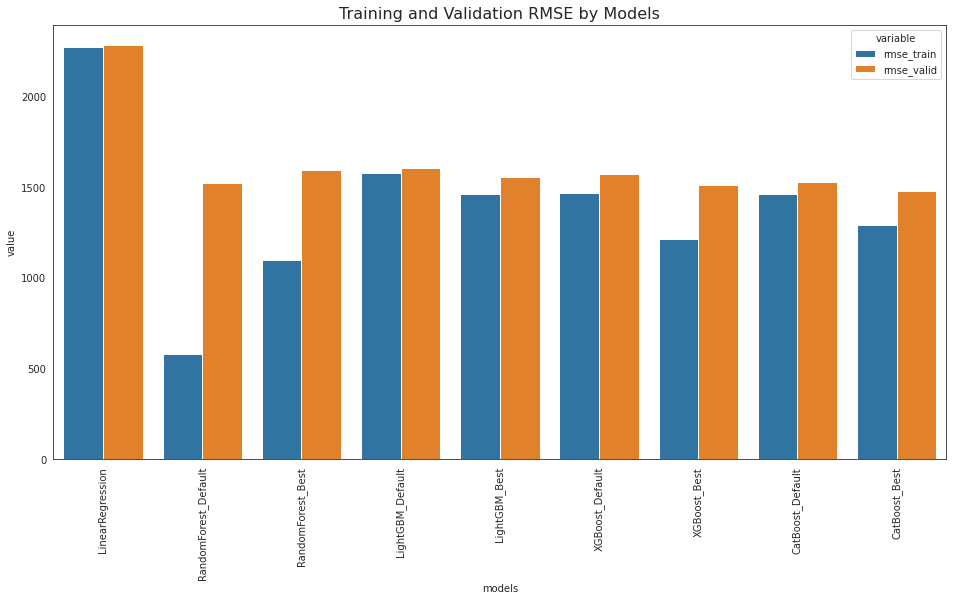

In [168]:
plt.figure(figsize=(16,8))
sns.barplot(data=performance_m, x='index', y='value',hue='variable')
plt.title('Training and Validation RMSE by Models',fontsize=16)
plt.xlabel('models')
plt.xticks(rotation=90)
plt.show()

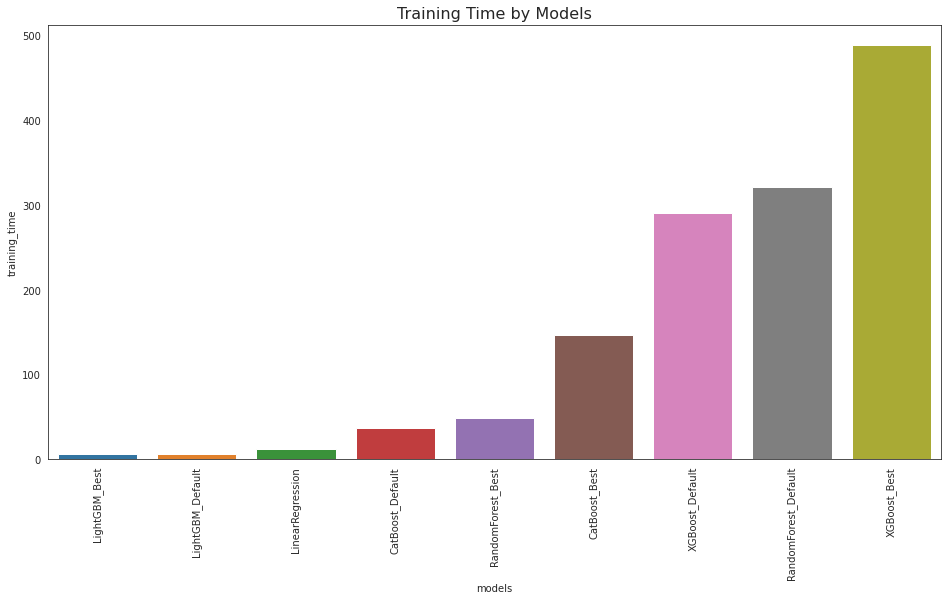

In [167]:
plt.figure(figsize=(16,8))
sns.barplot(data=train_time, x='index', y='training_time')
plt.title('Training Time by Models',fontsize=16)
plt.xlabel('models')
plt.xticks(rotation=90)
plt.show()

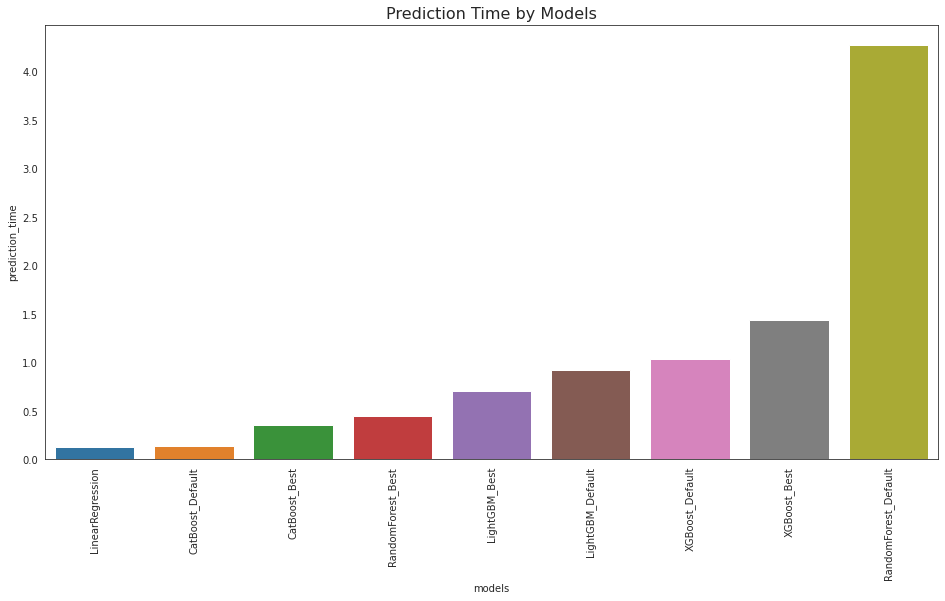

In [166]:
plt.figure(figsize=(16,8))
sns.barplot(data=predict_time, x='index', y='prediction_time')
plt.title('Prediction Time by Models',fontsize=16)
plt.xlabel('models')
plt.xticks(rotation=90)
plt.show()

Key Findings:
* On the validation set, CatBoost has the lowest validation set RMSE of 1,478 followed closely by XGBoost and LightGBM
* On the training set, Random Forest has the lowest RMSE, followed by XGBoost, CatBoost and LightGBM.
* Training speed is the lowest for LightGBM, lower than our dummy model, Linear Regression. CatBoost is the third best after Linear Regression, followed by Random Forest and XGBoost.
* Prediction time is the fastest in Linear Regression followed by CatBoost, Random Forest, LightGBM, and XGBoost.
* Random Forest has overfitting problem.
* CatBoost frequently has problem when training.

## 6. General Conclusion <a id='end'></a>

First, we conduct EDA. We found that there are many problems with the dataset:
*	DateCrawled, DateCreated, and LastSeen is in the wrong datatype.
*	There are 262 duplicated rows.
*	There are 181,077 missing data in these columns: VehicleType; Gearbox; Model; FuelType; and NotRepaired.
 *	Missing data for VehicleType are in vehicles with newer registration dates.
 *	NotRepaired data are missing more frequently in older registered vehicles.
 *	Other missing data seems to be appearing at random.
*	There are outliers in RegistrationYear, and Power columns.
 *	Vehicles with RegistrationYear far in the future (after 2019) and after maximum DateCrawled which is illogical.
 *	Vehicles with Power more than 2,012 hp is illogical as typical vehicles have 180-200 hp and the highest ever reached is 2,012 hp.
*	There are columns with RegistrationMonth equals to 0 which is illogical.
*	All the values in NumberOfPictures column equal to 0.

The mitigation for those problems are:
*	DateCrawled, DateCreated, and LastSeen is changed into datetime format.
*	All duplicated rows are removed.
*	Data with registration year after 2023 and registration month equals to 0 removed.
*	Remove all the missing values listwise.
*	Remove vehicles with registration year before 1987 and after 2017.
*	Remove vehicles with power less than -37.5 and more than 262.5.

Then we derive new variable: age which is the difference between maximum date and registration date (combination of registration year and month).

Next, we define features and targets columns then split them into training and validation set, with 30% of the data goes to validation set. After that, we encode features categorical columns and standardize numerical feature columns. We then define RMSE score to evaluate models.

Models trained in this research are linear regression, random forest regressor, LightGBM regressor, CatBoost regressor, and XGBoost regressor. We want to see the RMSE and speed of the models. With hyperparameter adjustment, CatBoost has the lowest validation set RMSE of 1,478 followed closely by XGBoost and LightGBM. On the training set, Random Forest has the lowest RMSE, followed by XGBoost, CatBoost and LightGBM. In terms of training speed, LightGBM is the fastest to be trained, faster than our dummy model, Linear Regression. CatBoost is the third best after Linear Regression, followed by Random Forest and XGBoost. And for the prediction time, Linear Regression is the fastest, followed by CatBoost, Random Forest, LightGBM, and XGBoost.

If **total running time** is the priority, we should use **LightGBM** as it is the fastest and gives a relatively good result. However, if **prediction accuracy** is the primary concern, **CatBoost** is recommended. Note that I frequently encounter problem with CatBoost when training the model. **Overall**, I recommend using **LightGBM** in this case.